<a href="https://www.kaggle.com/code/alirizaercan/artificial-neural-network-ann-minst-beginner?scriptVersionId=212822198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Problem
MNIST Dataset


# Data Understanding

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import numpy as np
import matplotlib.pyplot as plt

import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
filterwarnings('ignore')


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print('The shape of train dataset:', x_train.shape, y_train.shape)

The shape of train dataset: (60000, 28, 28) (60000,)


In [4]:
print('The shape of test dataset:', x_test.shape, y_test.shape)

The shape of test dataset: (10000, 28, 28) (10000,)


In [5]:
num_labels = len(np.unique(y_train))

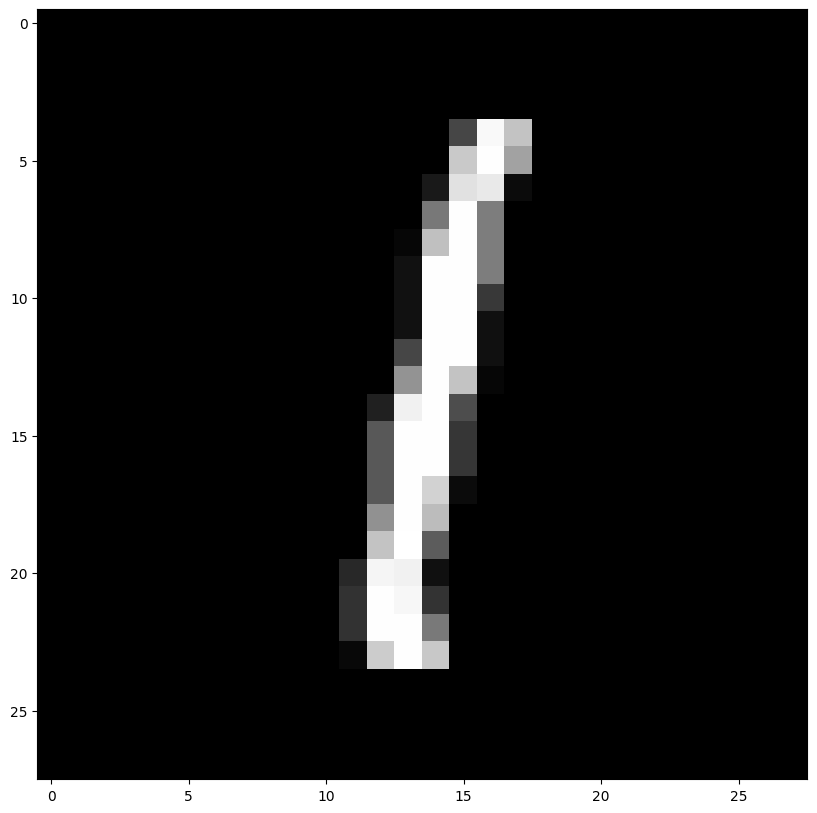

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(x_train[42000], cmap='gray')

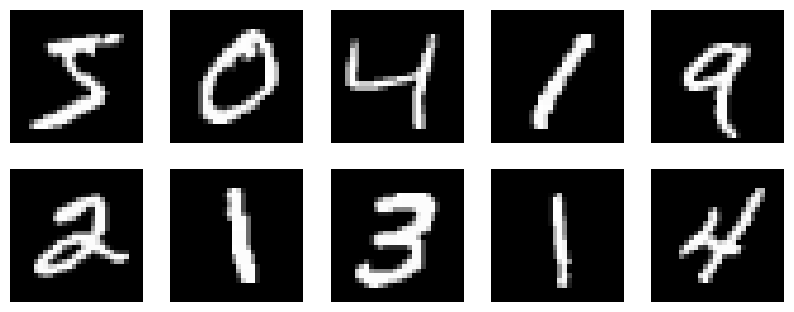

In [7]:
plt.figure(figsize=(10, 10))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap='gray')
  plt.axis('off')

In [8]:
def visualize_img(data):
  plt.figure(figsize=(10, 10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(data[n], cmap='gray')
    plt.axis('off')

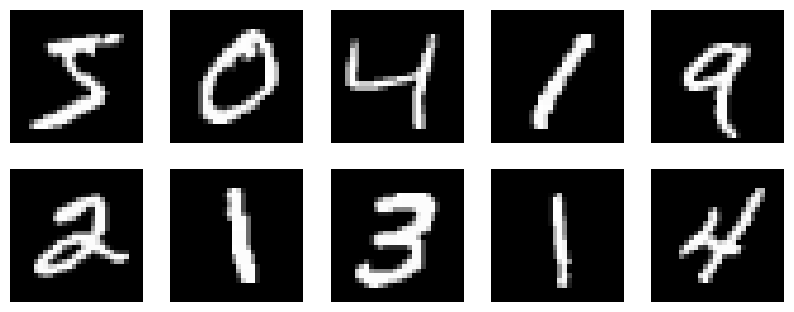

In [9]:
visualize_img(x_train)

In [10]:
# RGB (Red, Green, Blue)


In [11]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [12]:
x_train[2][10,10]

0

In [13]:
x_train[2][14,10]

49

In [14]:
x_train[2].mean()

24.799744897959183

In [15]:
x_train[2].sum()

19443

In [16]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [17]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [18]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  thresh = img.max()/2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y]<thresh else 'black')

  plt.show()

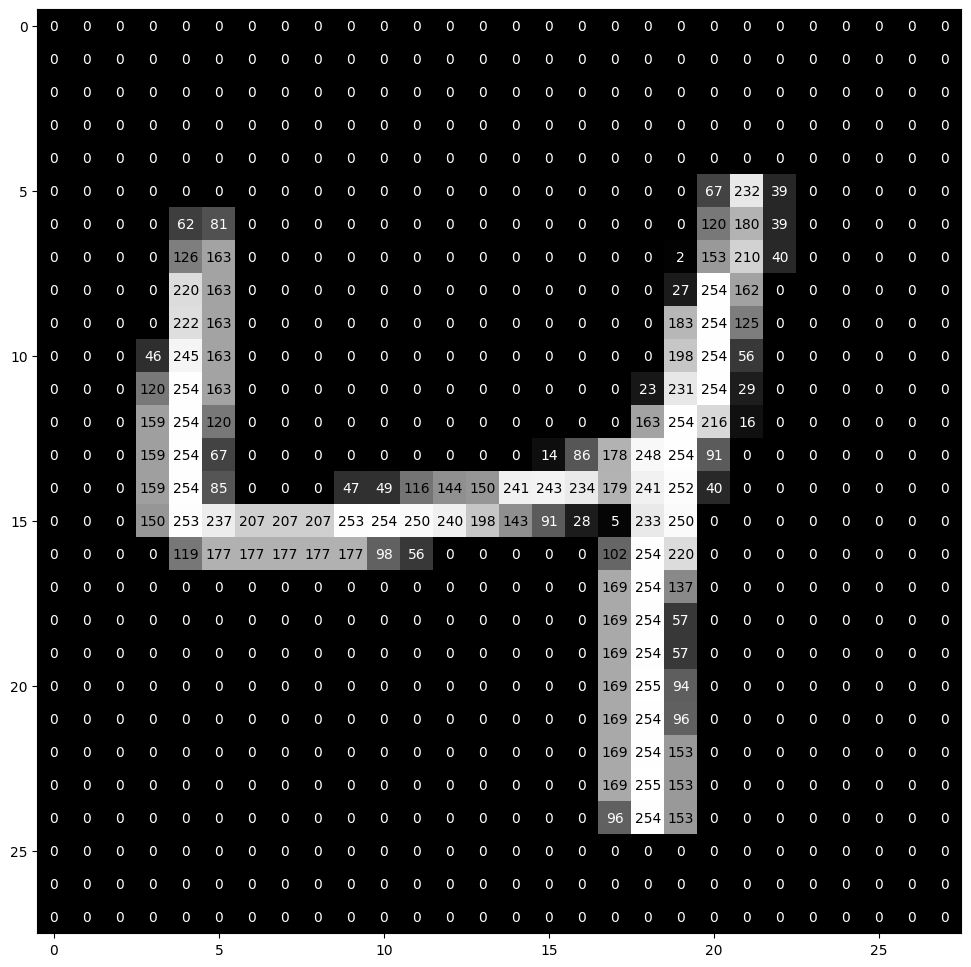

In [19]:
pixel_visualize(x_train[2])

# Data Preparation


## Encoding


In [20]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Reshaping

In [23]:
image_size = x_train.shape[1]
image_size

28

In [24]:
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


## Standarization


In [25]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Modelling


## Defining Neural Network Architecture

In [26]:
model = tf.keras.Sequential ([
    Flatten(input_shape=(28,28,1)),
    Dense(units = 128, activation='relu', name = 'layer1'),
    Dense(units = num_labels, activation='softmax', name = 'output_layer')
]
)

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]
)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8298 - loss: 0.6144 - precision: 0.9363 - recall: 0.7055 - val_accuracy: 0.9441 - val_loss: 0.1913 - val_precision: 0.9582 - val_recall: 0.9328
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9514 - loss: 0.1743 - precision: 0.9637 - recall: 0.9394 - val_accuracy: 0.9583 - val_loss: 0.1385 - val_precision: 0.9668 - val_recall: 0.9518
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9649 - loss: 0.1201 - precision: 0.9732 - recall: 0.9588 - val_accuracy: 0.9670 - val_loss: 0.1081 - val_precision: 0.9735 - val_recall: 0.9618
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9741 - loss: 0.0904 - precision: 0.9793 - recall: 0.9691 - val_accuracy: 0.9713 - val_loss: 0.0895 - val_precision: 0.9767 - val_recall: 0.9678
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9798 - loss: 0.0702 - precision: 0.9828 - recall: 0.9760 - val_accuracy: 0.9746 - val_loss: 0.

In [29]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9944 - loss: 0.0234 - precision: 0.9953 - recall: 0.9933 - val_accuracy: 0.9783 - val_loss: 0.0714 - val_precision: 0.9807 - val_recall: 0.9766
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9962 - loss: 0.0184 - precision: 0.9967 - recall: 0.9951 - val_accuracy: 0.9786 - val_loss: 0.0716 - val_precision: 0.9812 - val_recall: 0.9774
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9961 - loss: 0.0173 - precision: 0.9966 - recall: 0.9954 - val_accuracy: 0.9785 - val_loss: 0.0720 - val_precision: 0.9814 - val_recall: 0.9774
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9976 - loss: 0.0131 - precision: 0.9980 - recall: 0.9970 - val_accuracy: 0.9765 - val_loss: 0.0753 - val_precision: 0.9788 - val_recall: 0.9754
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9978 - loss: 0.0112 - precision: 0.9982 - recall: 0.9974 - val_accuracy: 0.9776 - val_loss: 0.

# Evaluation


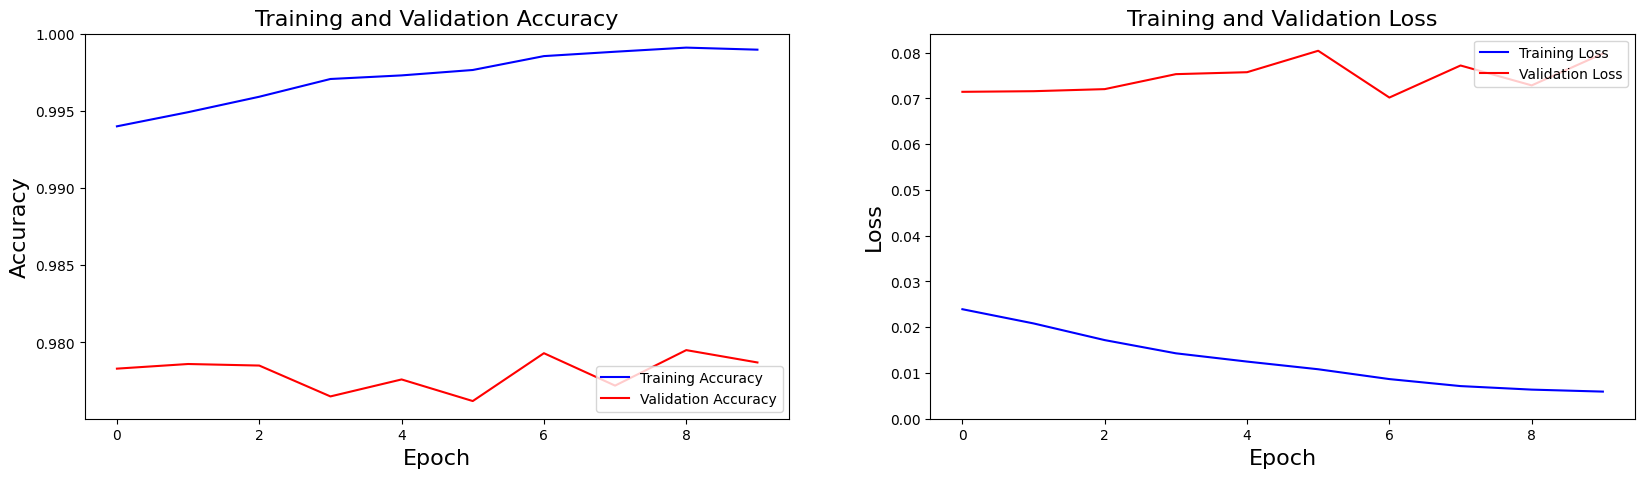

In [30]:
# Accuracy and Loss Charts

#Accuracy
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color = 'b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize = 16)

#Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], color = 'b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize = 16)
plt.show()

In [31]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print(f"\nTest Accuracy: %.1f%%" % (100.0 * acc))
print(f"\nTest Loss: %.1f%%" % (100.0 * loss))
print(f"\nTest Precision: %.1f%%" % (100.0 * precision))
print(f"\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 97.9%

Test Loss: 8.0%

Test Precision: 98.0%

Test Recall: 97.8%


# Save Model and Usage for Prediction

In [32]:
model.save('mnist_model.h5')

In [33]:
import random
random = random.randint(0, x_test.shape[0])

In [34]:
random

9863

In [35]:
test_image = x_test[random]


In [36]:
y_test[random]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

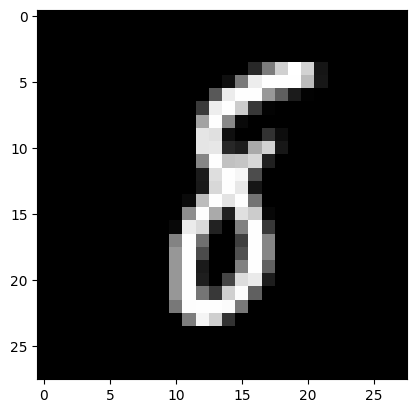

In [37]:
plt.imshow(test_image.reshape(28,28), cmap='gray')

In [38]:
test_data = x_test[random].reshape(1,28,28,1)

In [39]:
probability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [40]:
probability

array([[1.3116120e-08, 5.3299742e-09, 6.0107986e-08, 3.4046916e-08,
        9.9265518e-12, 1.5298295e-04, 1.1108585e-05, 1.3518150e-12,
        9.9983573e-01, 2.4542222e-11]], dtype=float32)

In [41]:
predicted_classes = np.argmax(probability)

In [42]:
predicted_classes

8

In [43]:
print(f"Predicted Value: {predicted_classes} \n")
print(f"Probability Value of Predicted Value: {(np.max(probability, axis = -1))[0]} \n")
print(f"Probability Value of Other Values: \n{probability}")

Predicted Value: 8 

Probability Value of Predicted Value: 0.999835729598999 

Probability Value of Other Values: 
[[1.3116120e-08 5.3299742e-09 6.0107986e-08 3.4046916e-08 9.9265518e-12
  1.5298295e-04 1.1108585e-05 1.3518150e-12 9.9983573e-01 2.4542222e-11]]
